In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

**Проект:** Анализ рынка видеогр.  
**Дано:** Дасет с данными о продажах игр, оценок пользователей и экспертов, жанрам и платформам и т.п.  
**Изучаемый период:** 1980-2016  
**Задача:** Выявить определяющие успешность игры закономерности для планирования закупок локального магазина видеоигр.  
>План:  
>1. Изучение датасета  
>2. Предобработка
>3. Исследовательский анализ  
>4. Портрет пользователя по регионам  
>5. Проверка гипотез  
>6. Вывод  

**Особенности**: В наборе данных попадается аббревиатура **ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение датасета

### Знакомоство

In [2]:
games_df = pd.read_csv('/datasets/games.csv')
games_df.head(13)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Полные дубликаты

In [3]:
mydups = games_df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 0


### Общая визуализация

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

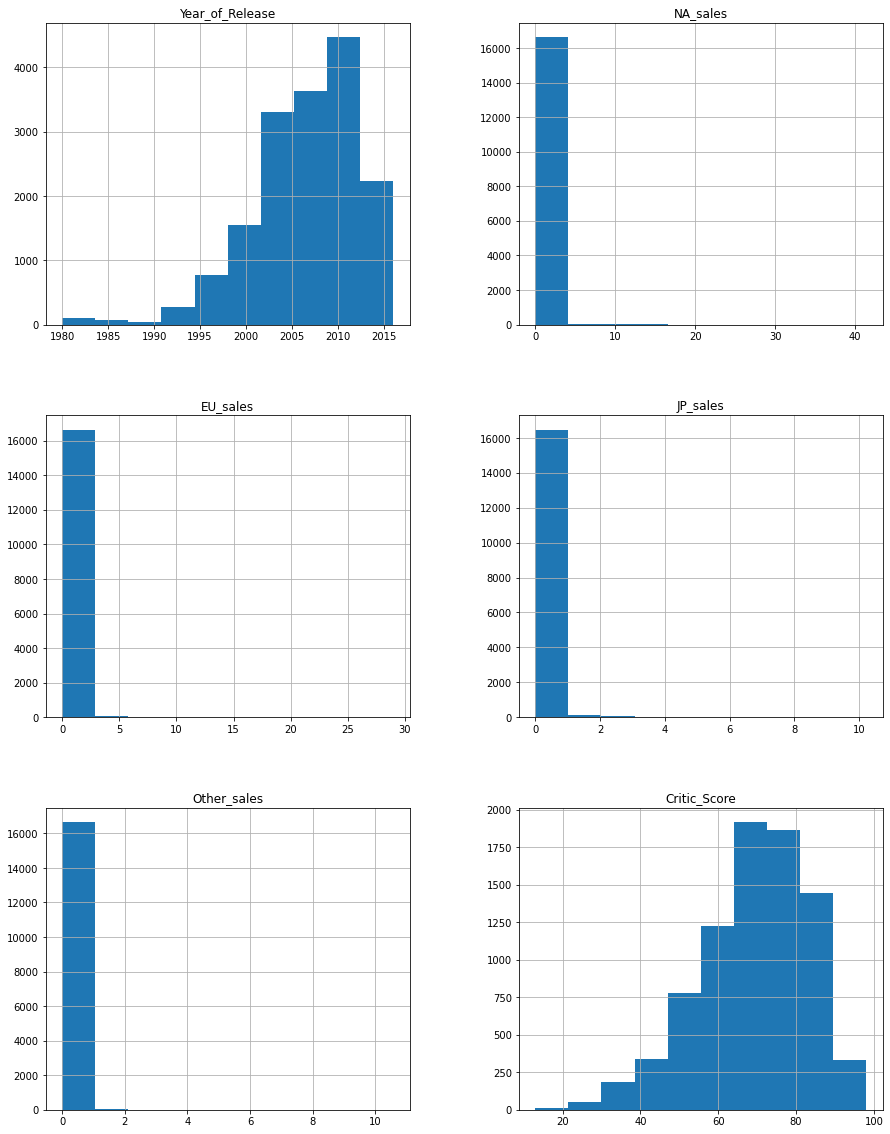

In [4]:
games_df.hist(figsize=(15,20))

### Описание датасета

In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Описание столбцов датасета  
**Name** — название игры  
**Platform** — игровая платформа  
**Year_of_Release** — год выпуска игры  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (млн проданных копий)  
**EU_sales** — продажи в Европе (млн  проданных копий)  
**JP_sales** — продажи в Японии (млн  проданных копий)  
**Other_sales** — продажи в других странах (млн  проданных копий)  
**Critic_Score** — оценка критиков  
**User_Score** — оценка пользователей  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)  

## Предобработка 

### Пропуски

In [7]:
games_df.isna().mean().sort_values(ascending=False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

Изучим пропуски. Наибольшее количество пропусков обнаружены в столбцах:  
**Critic_Score** — оценка критиков  
**Rating** — рейтинг от организации ESRB  
**User_Score** — оценка пользователей  
Изучим эти столбцы подробнее ниже.

### Корректировка названий столбцов

Приведем название столбцов к snakecase.

In [8]:
games_df.columns = games_df.columns.str.lower()
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Столбец  **user_score**: пропуски и строковые значения

In [9]:
games_df['user_score'].value_counts(dropna=False).head(10)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
Name: user_score, dtype: int64

В данном столбце больше всего значений лежит на "tbd".  
**TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено).  
Заменим tbd на -1, чтобы пропуски не помешали проверке гипотез в дальнейшем.

In [10]:
games_df['user_score'] = games_df['user_score'].replace('tbd', -1)
games_df['user_score'] = games_df['user_score'].fillna(-1)
user_score_nan = games_df['user_score'].isna().sum()
print('Количество пропусков в user_score', user_score_nan)

Количество пропусков в user_score 0


In [11]:
games_df['user_score'] = games_df['user_score'].fillna(-1)

In [12]:
games_df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### Столбец **rating**: пропуски и оптимизация

In [13]:
games_df['rating'].value_counts(dropna=False).head(10)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

**EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. 1994-2018  
**«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults"). 1994-н.в.  
**«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat. 2005 - н.в.  
**«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 1994-н.в.  
**«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 1994-н.в.  
**«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году. 1993 - н.в.  
**«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.  
**«RP 17+» («Rating Pending»)** — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.  
**Вывод №1**: Основные метрики и критерии рейтингования видеоигр появились в 1994 г.  
**Вывод №2**: Для оптимизиации информации необходимо:  
1. Рейтинг 'K-A' перевести в 'E'
2. Рейтинг 'ЕС' перевести в 'E'
3. Пропуски заполним значением 'RP'

In [14]:
games_df['rating'] = games_df['rating'].replace('K-A', 'E')
games_df['rating'] = games_df['rating'].replace('EC', 'E')
games_df['rating'] = games_df['rating'].fillna('RP')
games_df['rating'].value_counts(dropna=False).head(10)

RP      6769
E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

In [15]:
print('Количество пропусков в столбце rating', games_df['rating'].isna().sum())                                                                

Количество пропусков в столбце rating 0


### Столбец **critic_score**: пропуски

In [16]:
games_df['critic_score'].value_counts(dropna=False).head(10)                                         

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     235
72.0     226
74.0     226
Name: critic_score, dtype: int64

In [17]:
games_df['critic_score'] = games_df['critic_score'].fillna(-1)

In [18]:
games_df['cs_ten_rate'] = games_df['critic_score'] / 10
games_df['cs_ten_rate'] = games_df['cs_ten_rate'].fillna(-1)
games_df['cs_ten_rate'].unique()

array([ 7.6, -0.1,  8.2,  8. ,  8.9,  5.8,  8.7,  9.1,  6.1,  9.7,  9.5,
        7.7,  8.8,  8.3,  9.4,  9.3,  8.5,  8.6,  9.8,  9.6,  9. ,  8.4,
        7.3,  7.4,  7.8,  9.2,  7.1,  7.2,  6.8,  6.2,  4.9,  6.7,  8.1,
        6.6,  5.6,  7.9,  7. ,  5.9,  6.4,  7.5,  6. ,  6.3,  6.9,  5. ,
        2.5,  4.2,  4.4,  5.5,  4.8,  5.7,  2.9,  4.7,  6.5,  5.4,  2. ,
        5.3,  3.7,  3.8,  3.3,  5.2,  3. ,  3.2,  4.3,  4.5,  5.1,  4. ,
        4.6,  3.9,  3.4,  3.5,  4.1,  3.6,  2.8,  3.1,  2.7,  2.6,  1.9,
        2.3,  2.4,  2.1,  1.7,  2.2,  1.3])

### Столбец **year_of_release**: пропуски

In [19]:
print('Количество пропусков в столбце year_of_release', games_df['year_of_release'].isna().sum())  

Количество пропусков в столбце year_of_release 269


In [20]:
games_df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [21]:
games_df['year_of_release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [22]:
games_df.loc[games_df['year_of_release'].isna()].value_counts('name').head(15)

name
LEGO Harry Potter: Years 5-7               7
Rock Band                                  4
Happy Feet Two                             4
WRC: FIA World Rally Championship          3
Test Drive Unlimited 2                     3
Bejeweled 3                                3
Virtua Quest                               2
Captain America: Super Soldier             2
Port Royale 3                              2
LEGO Batman: The Videogame                 2
Robert Ludlum's The Bourne Conspiracy      2
Combat Elite: WWII Paratroopers            2
PDC World Championship Darts 2008          2
The Lord of the Rings: War in the North    2
The Golden Compass                         2
dtype: int64

269 строк с пропусками. Заменим на 0.

In [23]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(0)
print('Количество пропусков в столбце year_of_release', games_df['year_of_release'].isna().sum()) 

Количество пропусков в столбце year_of_release 0


### Столбцы **genre и name**: пропуски

In [24]:
print('Количество пропусков в столбце name', len(games_df[games_df['name'].isna()]))
print('Количество пропусков в столбце genre', len(games_df[games_df['genre'].isna()]))

Количество пропусков в столбце name 2
Количество пропусков в столбце genre 2


In [25]:
games_df[games_df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,RP,-0.1
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,RP,-0.1


In [26]:
games_df[games_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,RP,-0.1
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,RP,-0.1


In [27]:
games_df=games_df.dropna(subset=['genre'])

In [28]:
print('Количество пропусков в столбце name', len(games_df[games_df['name'].isna()]))

Количество пропусков в столбце name 0


Пропуски в столбцах name и genre находятся в одних и тех же строчках. Удалим эти 2 строки, как не информативные.

In [29]:
games_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [30]:
games_df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Измененим тип данных по году выпуска игры и оценке юзеров для удобства дальнейшей работы с данными.

### Изменение типов данных

In [31]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int16')
games_df['user_score'] = games_df['user_score'].astype('float64')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  cs_ten_rate      16713 non-null  float64
dtypes: float64(7), int16(1), object(4)
memory usage: 1.6+ MB


### Добавление столбцов

Создадим столбец с общими данными продаж

In [32]:
games_df['total_sales'] = (
                          games_df['na_sales'] + 
                          games_df['eu_sales'] + 
                          games_df['jp_sales'] + 
                          games_df['other_sales']
)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  cs_ten_rate      16713 non-null  float64
 12  total_sales      16713 non-null  float64
dtypes: float64(8), int16(1), object(4)
memory usage: 1.7+ MB


In [33]:
# функция категоризации платформ укрупненно
def game_platform(name):
    if name in ['PS2', 'PS3', 'PS', 'PS4', 'PSP', 'PSC']:
        return 'PS'
    elif name == "PC":
        return 'PC'
    elif name in ['X360', 'XOne', 'XBox', 'XB']:
        return 'Xbox'
    elif name in ['DS', '3DS', 'Wii', 'WiiU', 'GB', 'GBA', 'NES', 'N64', 'SNES', 'GC']:
        return 'Nintendo'
    else:
        return 'Other'
games_df['main_plat'] = games_df['platform'].apply(game_platform)
games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7.6,82.54,Nintendo
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,-0.1,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.2,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,-0.1,31.38,Nintendo


In [34]:
def game_type(name):
    if name in ['PS2', 'PS3', 'PS', 'PS4', 'X360', 'XOne', 
                  'Xbox', 'Wii', 'NES', 'N64', 'SNES', 'GC',
                  '2600', 'GEN', 'DC', 'XB']:
        return 'console'

    elif name in ['PSP', 'PSV', 'DS', '3DS', 'WiiU', 'SAT', 'GBA', 'GB']:
        return 'portative'
    elif name == "PC":
        return 'PC'  
    else:
        return 'Other'
games_df['dev_type'] = games_df['platform'].apply(game_type)
games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7.6,82.54,Nintendo,console
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,-0.1,40.24,Nintendo,console
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.2,35.52,Nintendo,console
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,32.77,Nintendo,console
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,-0.1,31.38,Nintendo,portative


**Вывод**: произведена предподговка данных: название столбцов к нижнему регистру, заменены типы данных, изучены пропуски и дубликаты. Добавлен столбец с общей суммой продаж и 100бальная метрика оценки для пользователей.

## Исследователький анализ данных

### По годам

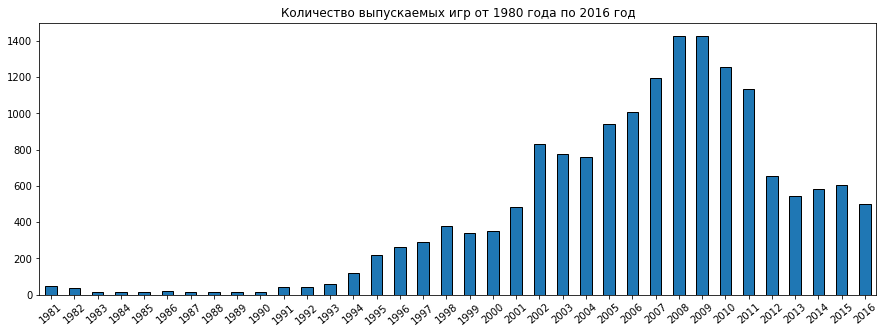

In [35]:
games_df = games_df.query('year_of_release > 1980 and year_of_release < 2017')
games_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black')
plt.title('Количество выпускаемых игр от 1980 года по 2016 год')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

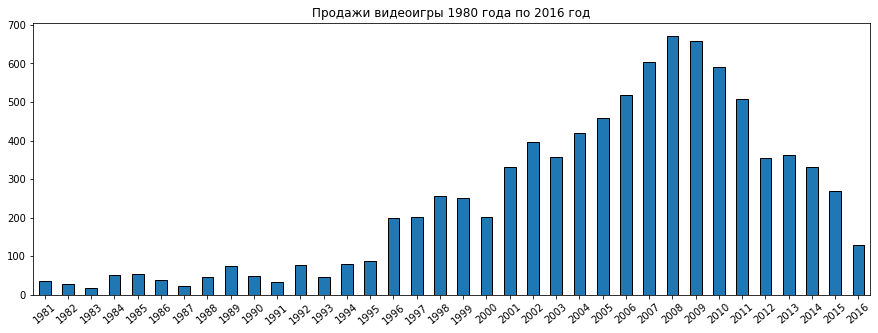

In [36]:

games_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black')
plt.title('Продажи видеоигры 1980 года по 2016 год')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

Игровая индустрия начинает активно развиваться с 1994 года. Пик развития приходится на 2006 - 2011 года, далее мы видим спад и с 2012 года некоторое выравнивание близкое к уровню 2001 - 2006 годов. Это может быть связано развитием игр на смартфонах.

### Анализ успешности платформ

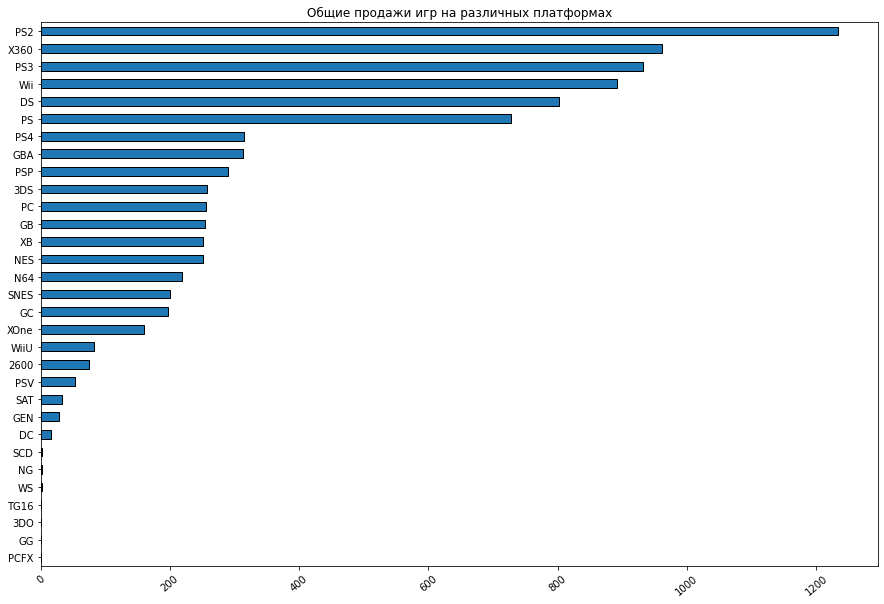

In [37]:
games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='total_sales', figsize=(15,10), edgecolor='black'
)
plt.title('Общие продажи игр на различных платформах')
plt.xticks(rotation=40)
plt.xlabel('')
plt.ylabel('')
plt.show()

ТОП5: PS2, PS3, Xbox360, Wii и DS.  
Самая популярная платформа - PlayStation.  
Добавим еще один столбец, чтобы изучить успешность по платформам укрупненно.

<AxesSubplot:>

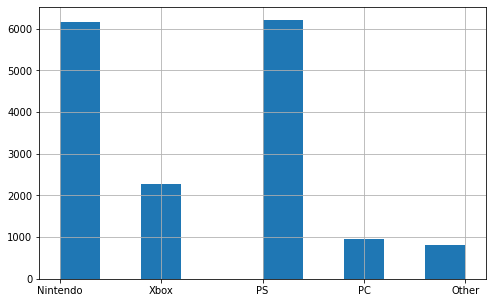

In [38]:
games_df['main_plat'].hist(bins=10, figsize=(8,5))

In [39]:
games_df.groupby('main_plat')['total_sales'].agg([ 'count', 'sum'])

,count,sum
main_plat,,
Nintendo,6169,3467.10
Other,819,211.85
PC,957,255.76
PS,6208,3496.15
Xbox,2282,1372.13


<AxesSubplot:>

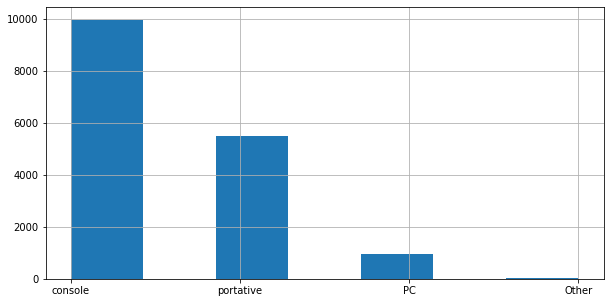

In [40]:
games_df['dev_type'].hist(bins=7, figsize=(10,5))

In [41]:
games_df.groupby('dev_type')['total_sales'].agg([ 'count', 'sum'])

,count,sum
dev_type,,
Other,31,5.05
PC,957,255.76
console,9964,6455.16
portative,5483,2087.02


### Анализ успешности платформ(портативная, стационарная) по годам

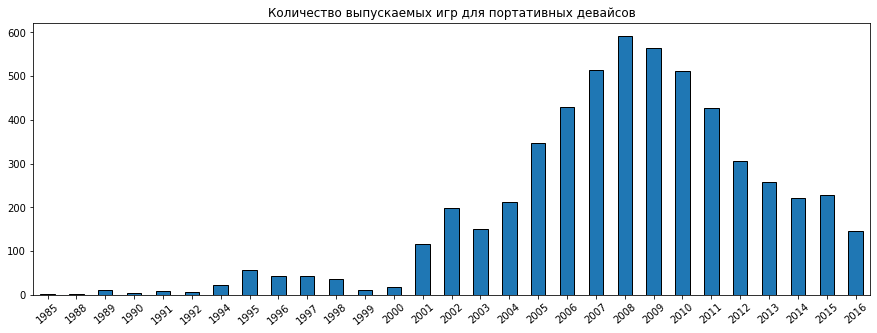

In [42]:
portable_df = games_df.query('dev_type == "portative"')
portable_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black')
plt.title('Количество выпускаемых игр для портативных девайсов')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

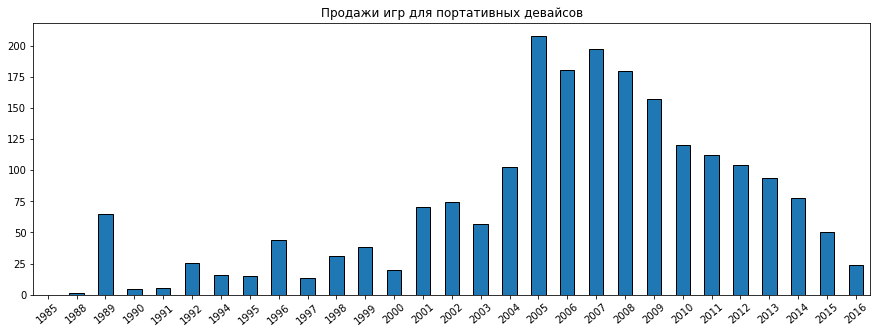

In [43]:
portable_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black')
plt.title('Продажи игр для портативных девайсов')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

**Вывод** популярность игр для портативных девайсов приходится на период с 2007 по 2010 в части кол-ва выпускаемых игр и на период с 2005 по 2008 в части рекордных доходов от продаж игр. Начиная с 2010 продажи на спад. Соотвественно нет смысла делать ставку на игры для портативных девайсов, поскольку их популярность сходит на нет.

In [44]:
portable_df.query('year_of_release == 1989').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,RP,-0.1,30.26,Nintendo,portative
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,-1.0,-1.0,RP,-0.1,18.14,Nintendo,portative
172,Dr. Mario,GB,1989,Puzzle,2.18,0.96,2.00,0.20,-1.0,-1.0,RP,-0.1,5.34,Nintendo,portative
779,Golf,GB,1989,Sports,0.83,0.33,0.92,0.04,-1.0,-1.0,RP,-0.1,2.12,Nintendo,portative
857,Tennis,GB,1989,Sports,0.75,0.30,0.90,0.04,-1.0,-1.0,RP,-0.1,1.99,Nintendo,portative


In [45]:
portable_df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,-0.1,31.38,Nintendo,portative
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,RP,-0.1,30.26,Nintendo,portative
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,8.9,29.80,Nintendo,portative
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,RP,-0.1,24.67,Nintendo,portative
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,9.1,23.21,Nintendo,portative
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,-1.0,-1.0,RP,-0.1,23.09,Nintendo,portative
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,7.7,20.14,Nintendo,portative


Аномальные продажи за 1989 обьясняются суперпопулярностью игры Тетрис в тот период

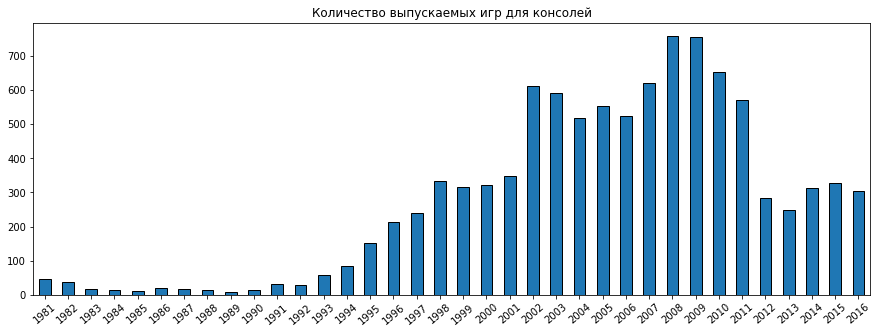

In [46]:
console_df = games_df.query('dev_type == "console"')
console_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black')
plt.title('Количество выпускаемых игр для консолей')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

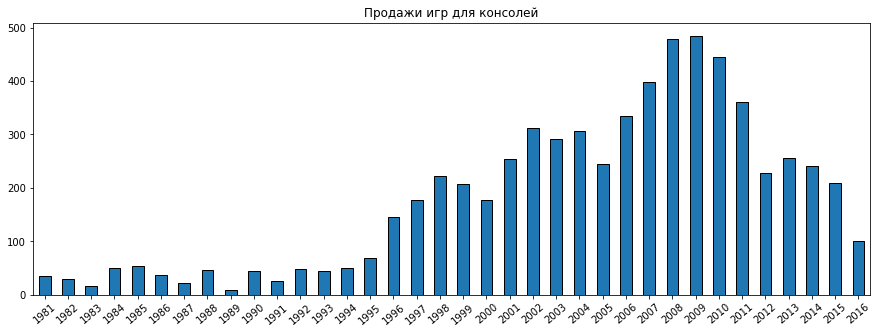

In [47]:
console_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black')
plt.title('Продажи игр для консолей')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

In [48]:
console_df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7.6,82.54,Nintendo,console
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,-0.1,40.24,Nintendo,console
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.2,35.52,Nintendo,console
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,32.77,Nintendo,console
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,5.8,28.91,Nintendo,console
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,8.7,28.32,Nintendo,console
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,RP,-0.1,28.31,Nintendo,console


Расцвет игровых консолей и игр к ним начался во второй половине девяностых. Самым урожайным отрезком, как в части количество выпущенных игр, так и в части дохода с продаж можно считать период с 2002 по 2011. С 2012 произошёл спад и стабилизация на определенном уровне, который держался до 2015. Данные за 2016 только частичные, поэтому это не показатель спада.  
**Вывод: игры для консолей являются более перспективными в части продаж, нежели портативные игры**

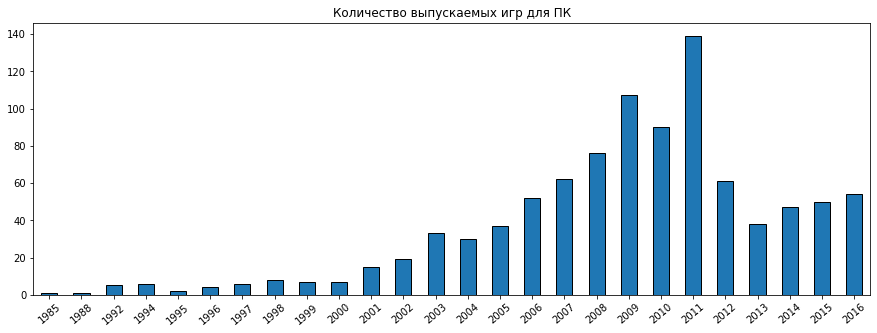

In [49]:
pc_df = games_df.query('dev_type == "PC"')
pc_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black')
plt.title('Количество выпускаемых игр для ПК')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

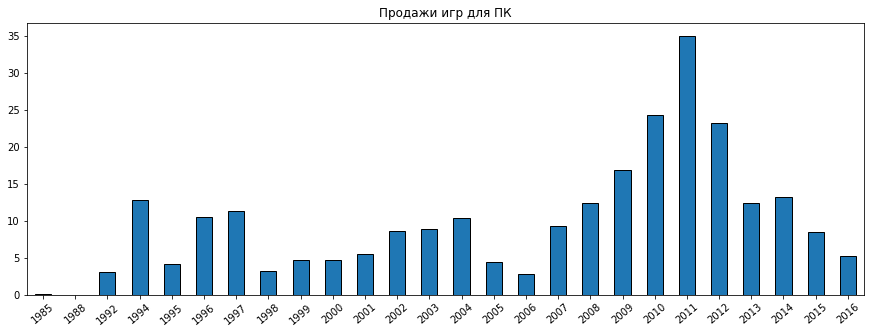

In [50]:
pc_df = games_df.query('dev_type == "PC"')
pc_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black')
plt.title('Продажи игр для ПК')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

In [51]:
pc_df.query('year_of_release == 2011').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,9.4,3.88,PC,PC
480,Star Wars: The Old Republic,PC,2011,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,T,8.5,2.97,PC,PC
538,Battlefield 3,PC,2011,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,M,8.9,2.78,PC,PC
1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.0,0.32,78.0,2.5,M,7.8,1.71,PC,PC
1252,Football Manager 2012,PC,2011,Sports,0.02,1.16,0.0,0.33,84.0,8.0,E,8.4,1.51,PC,PC


In [52]:
pc_df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.6,8.01,PC,PC
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,9.3,6.29,PC,PC
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,8.8,5.14,PC,PC
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.00,0.20,-1.0,-1.0,RP,-0.1,5.11,PC,PC
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,9.3,4.83,PC,PC
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,1.70,2.27,0.00,0.23,-1.0,-1.0,RP,-0.1,4.20,PC,PC
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M,9.6,4.12,PC,PC


Продажи игр для ПК находятся на задворках игровой индустрии, при этом 2011 год стал наиболее урожайным в части продаж, в первую очередь благодаря игре The Elder Scrolls V: Skyrim.

### Сегментирование по платформам укрупненно

**Nintendo**

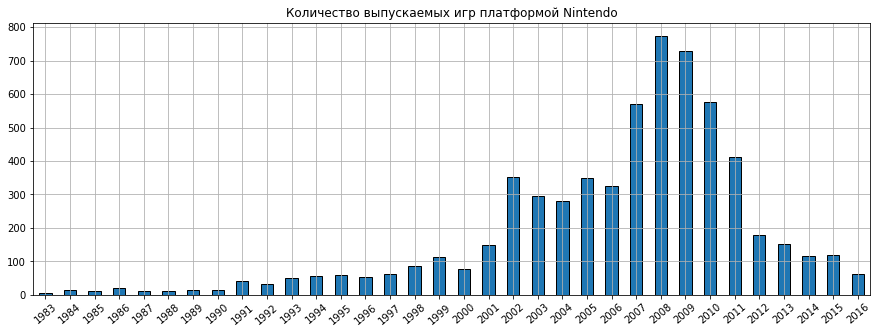

In [53]:
nin_df = games_df.query('main_plat == "Nintendo"')
nin_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Количество выпускаемых игр платформой Nintendo')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

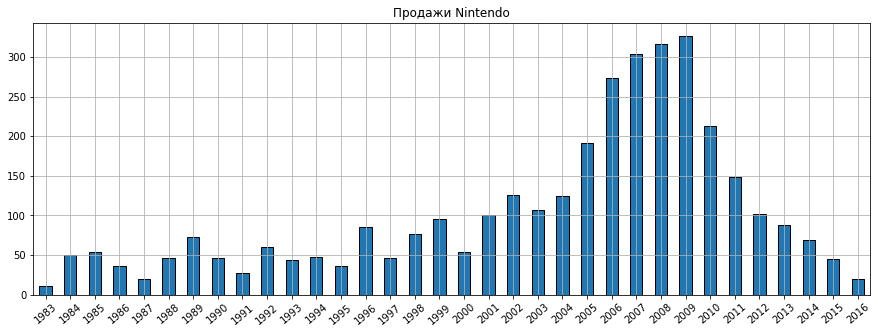

In [54]:
nin_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Продажи Nintendo')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

**Playstation**

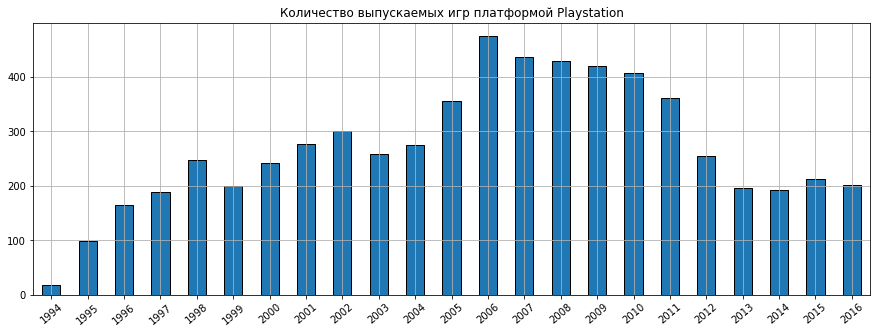

In [55]:
ps_df = games_df.query('main_plat == "PS"')
ps_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Количество выпускаемых игр платформой Playstation')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

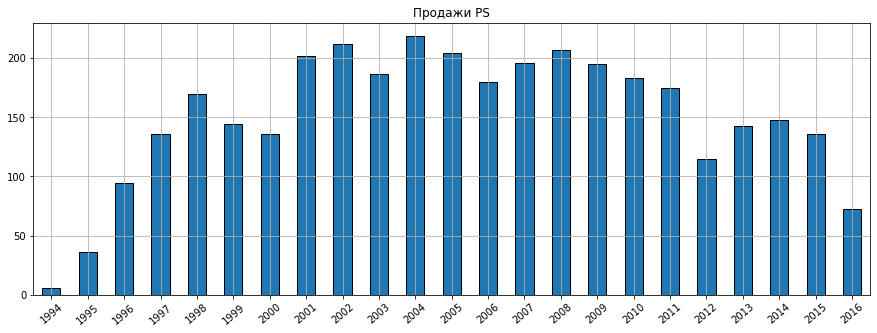

In [56]:
ps_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Продажи PS')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

**XBox**

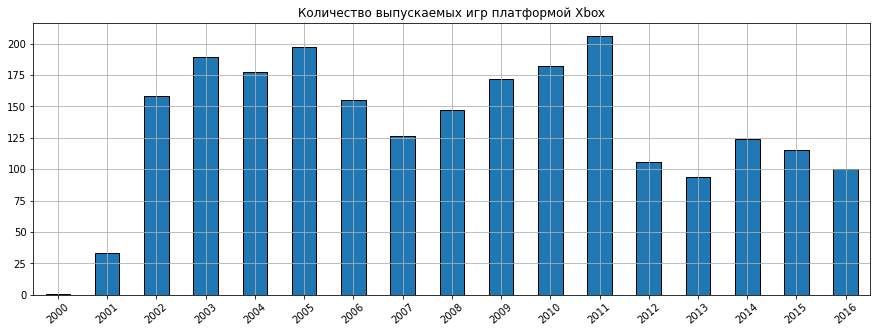

In [57]:
xbox_df = games_df.query('main_plat == "Xbox"')
xbox_df.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Количество выпускаемых игр платформой Xbox')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

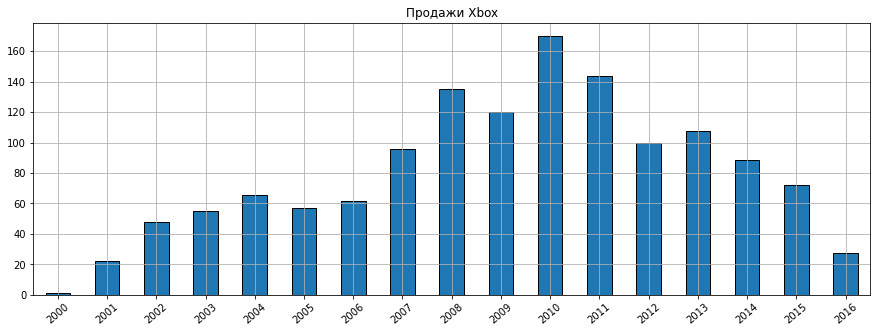

In [58]:
xbox_df.groupby('year_of_release')['total_sales'].sum().plot(
            kind='bar', y='total_sales', figsize=(15,5), edgecolor='black', grid=True)
plt.title('Продажи Xbox')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

### Топ 10 платформ по продажам

In [59]:
games_df.groupby('platform')['total_sales'].sum().to_frame(
                                                        'total_sales').sort_values(
                                                        by='total_sales', ascending=False
                                                        ).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Абсолютный топ по продажам: PS2, X360, PS3, Wii, DS, PS  
При этом на момент прогноза все эти плафтормы являются устаревшими и неактуальными.

In [60]:
list_platform = ['PS4', 'PC', '3DS', 'XOne']
games_old = games_df.query('platform not in @list_platform').copy()
born_year = games_df.groupby('platform')['year_of_release'].agg(min)
deadline = games_df.groupby('platform')['year_of_release'].agg(max)
life_time = deadline - born_year
life_time.to_dict()
games_old['life_time'] = games_old['platform'].map(life_time)
games_old.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type,life_time
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,7.6,82.54,Nintendo,console,10
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,-0.1,40.24,Nintendo,console,11
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.2,35.52,Nintendo,console,10
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,32.77,Nintendo,console,10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,-0.1,31.38,Nintendo,portative,13


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


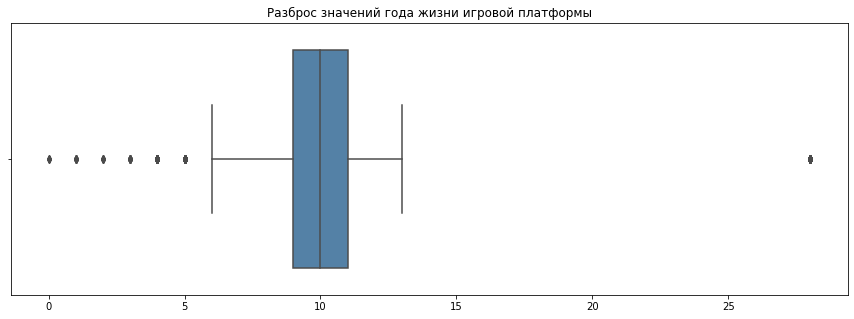

In [61]:
q75 = games_old['life_time'].quantile([.75])
q25 = games_old['life_time'].quantile([.25])
iqr = q75 - q25
low_range = q25 - (1.5 * iqr)
high_range = q75 + (1.5 * iqr)
plt.figure(figsize=(15, 5))
sns.boxplot(games_old['life_time'], color='steelblue')
plt.xlim = (low_range, high_range)
plt.title('Разброс значений года жизни игровой платформы')
plt.xlabel('')
plt.show()

In [62]:
games_pivot = games_old.query('5 <= life_time <=15 ').pivot_table(index='platform', 
                         values='life_time').sort_values(
                         by='life_time', ascending=False
                        )
games_pivot.head(15)

,life_time
platform,
GB,13
PS2,11
PSP,11
X360,11
NES,11
Wii,10
DC,10
PS3,10
SNES,9


In [63]:
print(f'Медианное время жизни платформы: {games_pivot["life_time"].median()}, лет')
print(f'Среднее время жизни платформы: {round(games_pivot["life_time"].mean(), 1)}, лет')

Медианное время жизни платформы: 9.0, лет
Среднее время жизни платформы: 8.8, лет


In [64]:
games_2012_2016 = games_df.query('year_of_release >=2012').reset_index(drop=True)
games_2012_2016.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,9.7,21.05,PS,console
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,9.7,16.27,Xbox,console
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,-0.1,14.63,PS,console
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,-0.1,14.60,Nintendo,portative
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,8.3,13.79,PS,console
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,8.3,13.68,Xbox,console
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,9.7,12.62,PS,console
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,RP,-0.1,11.68,Nintendo,portative
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,7.3,10.24,Xbox,console
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,7.8,9.90,Nintendo,portative


In [65]:
pd.crosstab(games_2012_2016['platform'], 
            games_2012_2016['year_of_release'],
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,total
platform,,,,,,
total,653,544,581,606,502,2886
PS3,148,126,108,73,38,493
PSV,53,63,100,110,85,411
3DS,93,91,80,86,46,396
PS4,0,16,75,137,164,392
X360,106,75,63,35,13,292
PC,61,38,47,50,54,250
XOne,0,19,61,80,87,247
PSP,106,54,10,3,0,173


In [66]:
leaders = ['PS4', 'PC', 'XOne', '3DS']
leaders_games = games_2012_2016.query('platform in @leaders')

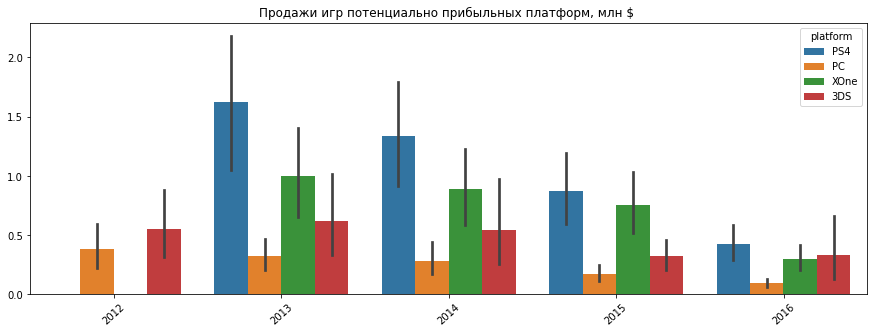

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = leaders_games,
            hue_order = leaders
           )

plt.title('Продажи игр потенциально прибыльных платформ, млн $ ')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

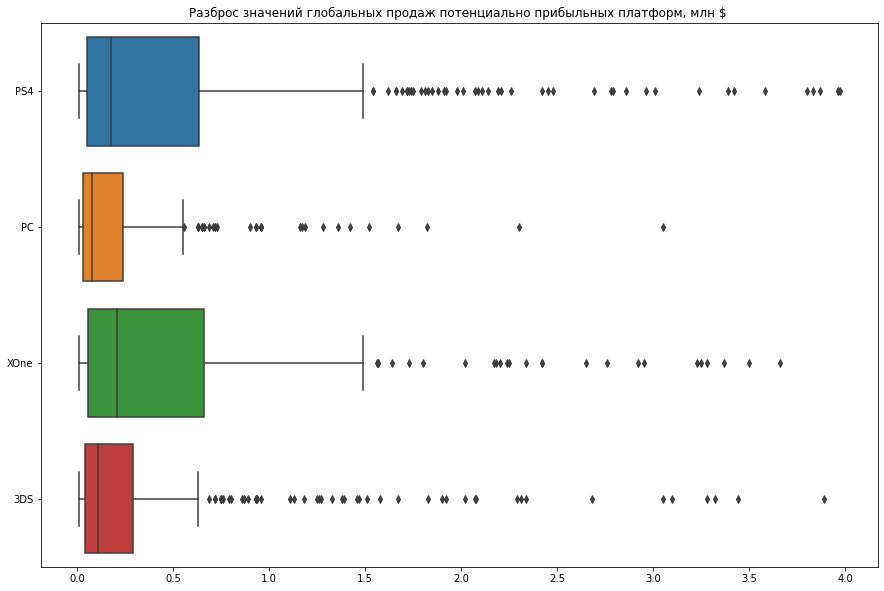

In [68]:
plt.figure(figsize=(15,10))

sns.boxplot(y='platform', x='total_sales',
            data = leaders_games.query('total_sales < 4')
            ,order=leaders, orient='h', 
           )
plt.title('Разброс значений глобальных продаж потенциально прибыльных платформ, млн $ ')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Анализ по жанрам

In [69]:
top_games = games_2012_2016.pivot_table(index='genre',columns='year_of_release'
                        ,values='total_sales',aggfunc='sum').copy()
top_games

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
Action,119.25,122.51,97.23,72.02,30.11
Adventure,5.79,6.09,5.57,8.16,3.82
Fighting,9.18,7.09,15.85,7.90,4.47
Misc,22.22,25.27,23.38,11.57,2.60
Platform,18.37,24.54,8.81,6.05,3.23
Puzzle,1.72,0.96,1.49,0.71,0.01
Racing,13.61,12.37,16.66,8.07,2.79
Role-Playing,46.91,44.45,45.62,37.64,18.18
Shooter,71.75,62.04,65.21,67.51,38.22


In [70]:
top_games = games_2012_2016.pivot_table(index='genre',columns='year_of_release'
                        ,values='total_sales', aggfunc=['median']).copy()
top_games

median                            
year_of_release   2012   2013   2014   2015   2016
genre                                             
Action           0.170  0.200  0.205  0.070  0.050
Adventure        0.040  0.025  0.040  0.030  0.020
Fighting         0.190  0.155  0.130  0.100  0.085
Misc             0.190  0.175  0.160  0.190  0.040
Platform         0.150  0.385  0.830  0.100  0.100
Puzzle           0.020  0.100  0.050  0.045  0.010
Racing           0.245  0.340  0.170  0.150  0.050
Role-Playing     0.180  0.180  0.110  0.105  0.120
Shooter          0.415  0.340  0.660  0.925  0.240
Simulation       0.195  0.105  0.120  0.200  0.025
Sports           0.280  0.370  0.460  0.120  0.120
Strategy         0.090  0.190  0.060  0.045  0.060

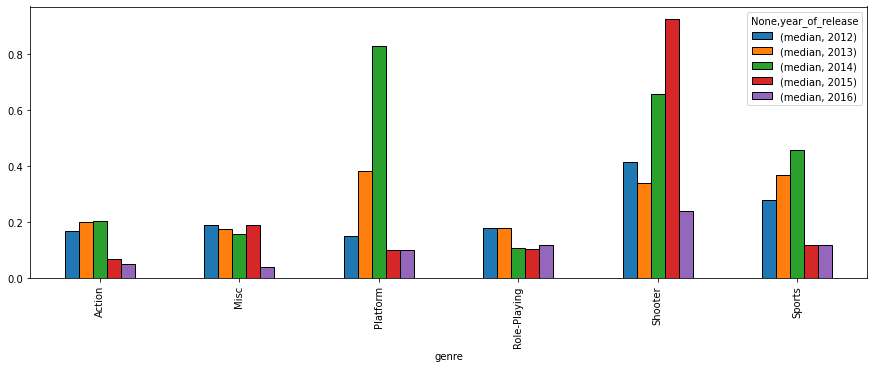

In [71]:
top_genres = ['Action', 'Role-playing', 'Shooter', 'Sports', 'Platform', 'Misc', 'Role-Playing']
top_games.query('genre in @top_genres').plot(kind='bar', figsize=(15,5), edgecolor='black')
plt.title('')
plt.show()

**Вывод:** На первый взгляд кажется, что игры жанра Action самые прибильные, но построив таблицу с медианной, мы видим, что  сборы связаны с большим количеством игр и их средние/медианные значения не соотвествуют рекордным сборам.  
Вероятно основной объем делает несколько бестселлеров, которые формируют эти внушительные цифры, но в среднем среди этого жанра довольно много посредственностей.  
Альтернативное открытие это жанр Shooter. Лучшие результаты по медианному значению говорят о том, что это наименее проигрышный жанр в контексте прибыли.  
Тем не менее Action и Simulation также заслуживают своё место на полке магазина. При этом по этим жанрам необходимо более глубокое исследование на предмет перспектив конкретной игры. Вероятно FIFA всегда будет иметь высокие продажи, а вот симулятор бильярда или керлинга вряд ли сможет надеяться на сверхприбыли.

### Актуальный анализ за 2012-2016

**Playstation 4**

In [72]:
ps4_df = games_2012_2016.loc[games_2012_2016['platform']=='PS4']
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,-0.1,14.63,PS,console
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,9.7,12.62,PS,console
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.2,8.58,PS,console
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,RP,-0.1,7.98,PS,console
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,8.3,7.66,PS,console


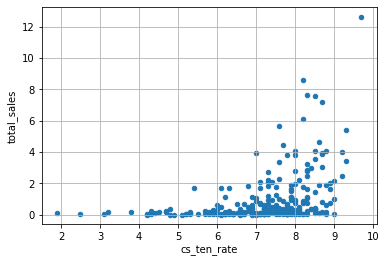

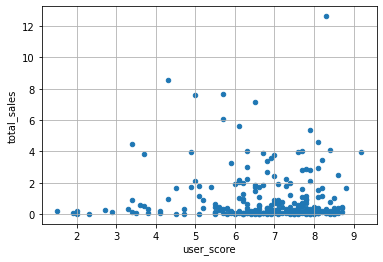

In [73]:
ps4_df = ps4_df.query('cs_ten_rate > 0 and user_score > 0')
ps4_df.plot(x='cs_ten_rate', y='total_sales', kind='scatter', grid=True)
ps4_df.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.show()

**Xbox One**

In [74]:
xone_df = games_2012_2016.loc[games_2012_2016['platform']=='XOne']
xone_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
21,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,RP,-0.1,7.39,Xbox,console
31,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,9.7,5.47,Xbox,console
34,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,8.1,5.26,Xbox,console
44,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,8.4,4.49,Xbox,console
53,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,8.8,4.22,Xbox,console


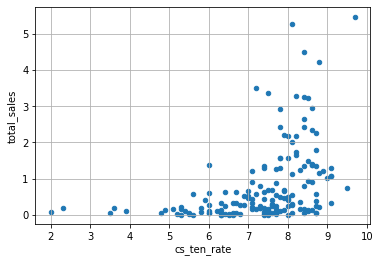

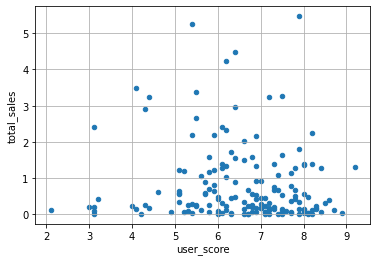

In [75]:
xone_df = xone_df.query('cs_ten_rate > 0 and user_score > 0')
xone_df.plot(x='cs_ten_rate', y='total_sales', kind='scatter', grid=True)
xone_df.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.show()

**Nintendo 3DS**

In [76]:
threeds_df = games_2012_2016.loc[games_2012_2016['platform']=='3DS']
threeds_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,-0.1,14.60,Nintendo,portative
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,RP,-0.1,11.68,Nintendo,portative
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,7.8,9.90,Nintendo,portative
13,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,8.8,9.17,Nintendo,portative
20,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,RP,-0.1,7.55,Nintendo,portative


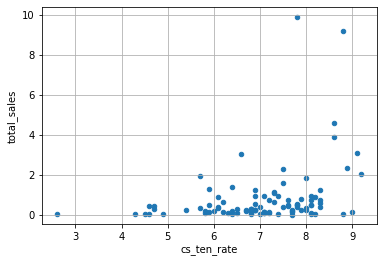

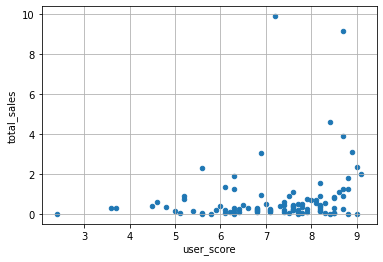

In [77]:
threeds_df = threeds_df.query('cs_ten_rate > 0 and user_score > 0')
threeds_df.plot(x='cs_ten_rate', y='total_sales', kind='scatter', grid=True)
threeds_df.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.show()

**Вывод**: Наиболее явное влияние рейтинга критиков на продажи можно отметить для PS4. Чуть менее явная зависимость для Xbox. При этом рейтингов пользователей для любой из платформ имеет еще меньшее влияние на продажи. 
В целом корреляция оценок пользователей с продажами - очень слабая, оценок критиков - слабая.

## Портрет пользователя для каждого региона

### По платформам

**Севарная америка**

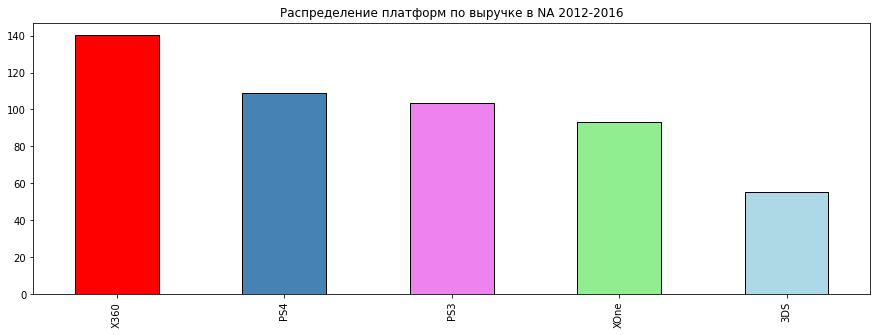

In [78]:
na_data = games_2012_2016.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head()
na_data.plot(y='platform', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )
plt.title('Распределение платформ по выручке в NA 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

**Европа**

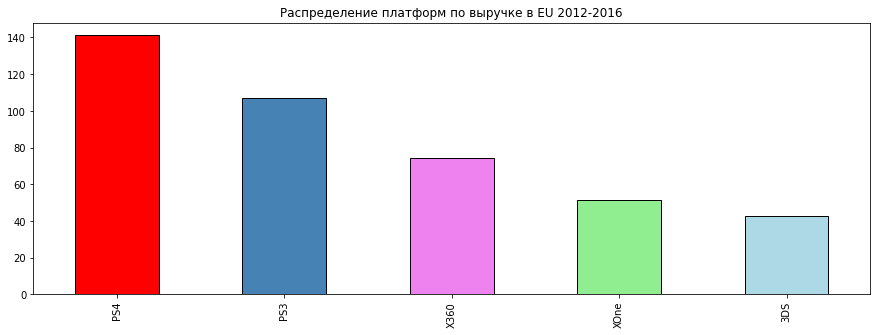

In [79]:
eu_data = games_2012_2016.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head()
eu_data.plot(y='platform', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )
plt.title('Распределение платформ по выручке в EU 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

**Япония**

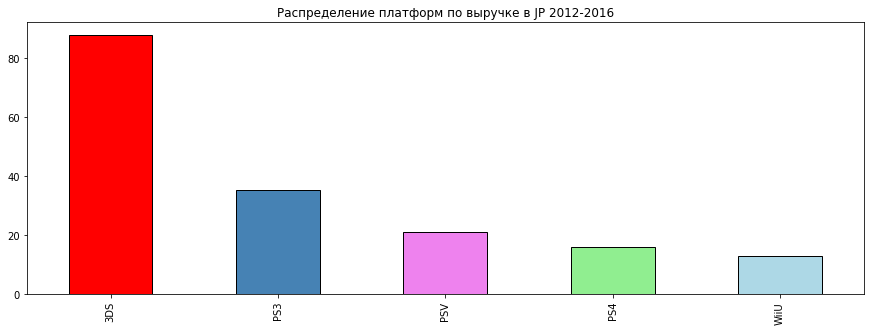

In [80]:
jp_data = games_2012_2016.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head()
jp_data.plot(y='platform', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )
plt.title('Распределение платформ по выручке в JP 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

**Остальной мир**

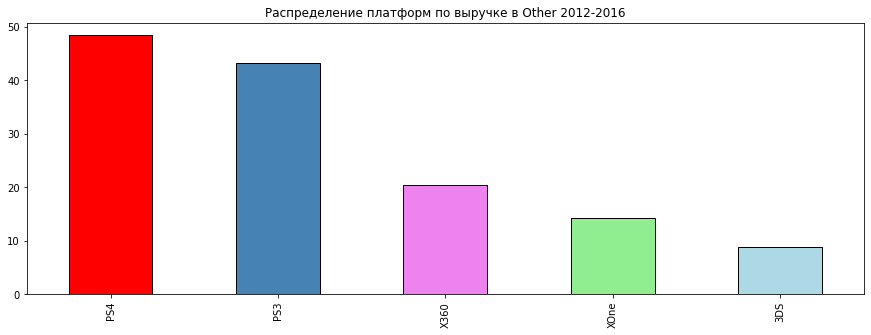

In [81]:
other_data = games_2012_2016.groupby(['platform'])['other_sales'].sum().sort_values(ascending=False).head()
other_data.plot(y='platform', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )
plt.title('Распределение платформ по выручке в Other 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

### По жанрам

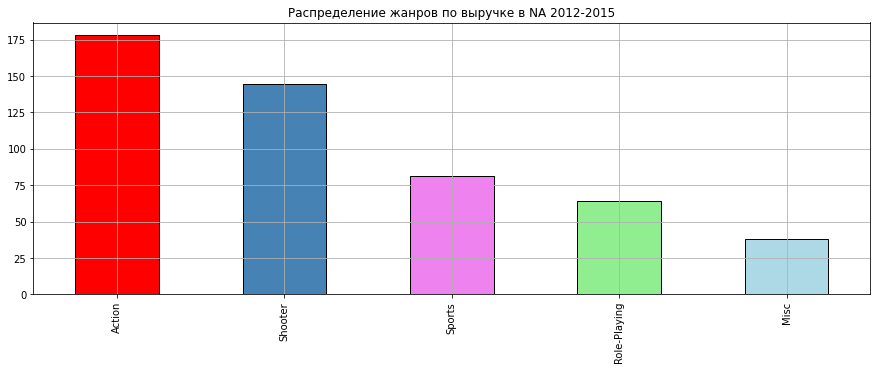

In [82]:
na_data = games_2012_2016.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head()
na_data.plot(y='genre', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black', grid=True
             )
plt.title('Распределение жанров по выручке в NA 2012-2015')
plt.ylabel('')
plt.xlabel('')
plt.show()

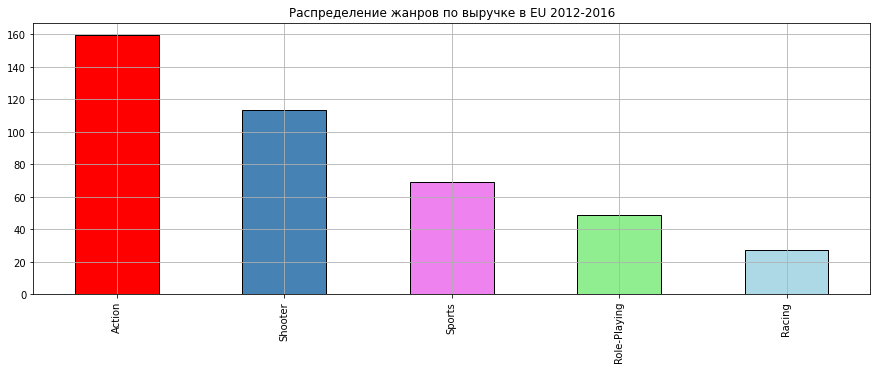

In [83]:
eu_data = games_2012_2016.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head()
eu_data.plot(y='genre', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black', grid=True
             )
plt.title('Распределение жанров по выручке в EU 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

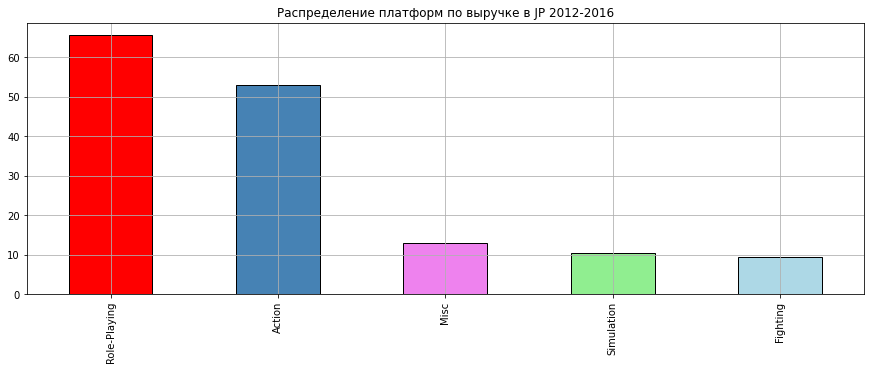

In [84]:
jp_data = games_2012_2016.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head()
jp_data.plot(y='genre', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black', grid=True
             )
plt.title('Распределение платформ по выручке в JP 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

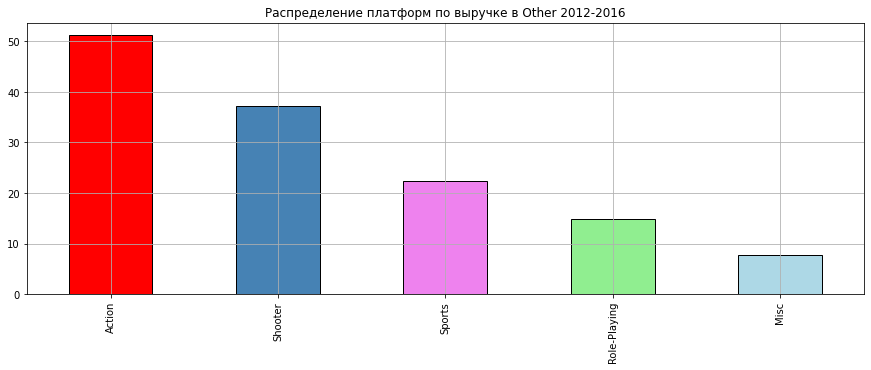

In [85]:
other_data = games_2012_2016.groupby(['genre'])['other_sales'].sum().sort_values(ascending=False).head()
other_data.plot(y='genre', kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black', grid=True
             )
plt.title('Распределение платформ по выручке в Other 2012-2016')
plt.ylabel('')
plt.xlabel('')
plt.show()

**Рынок видеоигр Японии** являюется атипичным(по сравнению с Европой и Америкой) и очень специфичным. 
Пока весь мир котирует игры жанра Action, японцы фанатеют от жанра "Role-Playing".  
В первую очередь речь об игре "Pokemon Red/Pokemon Blue". В целом основная доля продаж в Японии лежит на играх для GameBoy и DS. Это портативные устройства.
При этом общий анализ динамика рынка показывает, что пик портативных устройств пришёлся на период 2008-2011 года и потом, с появлением смартфонов-конкуретнов рынок демонстрирует ежегодное сокращение.  
**Рынки Европы и Северной Америки** имеют большое общего(например, самые популярные жанры Action и Shooter), при этом надо отметить, что любители видеоигр из Северной Америки традционно отдавали предпочтение платформе Xbox, как местному производителю. К сожалению, выборка не позволяет проверить гипотезу, о том что впоследствии Хbox проиграл конкуренцию PS даже на родном рынке.  
**Вывод**: востребованность и актуальность платформ и видеоигр во много зависит от региона продаж, при это точно можно сказать, что век портативных девайсов прошёл и вне Японии сложно рассчитывать на существенные прибыли от продаж видеоигр данного сегмента. Основная стационарная консоль Nintendo - Wii не смогла составить конкуренцию лидерам рынка консолей, несмотря на выдающиеся продажи Sports Wii.

### Влияние ESRB

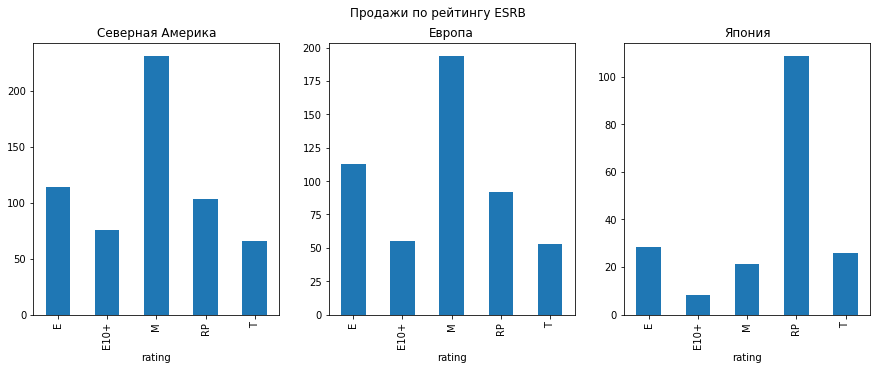

In [86]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['Северная Америка', 'Европа','Япония']


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Продажи по рейтингу ESRB')
for i, sale in enumerate(region_sales):
    for region in regions:
        games_2012_2016.groupby('rating')[sale].sum().plot(
                                                       kind='bar', ax=ax[i], title=regions[i])
    

In [87]:
games_2012_2016.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cs_ten_rate,total_sales,main_plat,dev_type
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,9.7,21.05,PS,console
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,9.7,16.27,Xbox,console
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,-0.1,14.63,PS,console
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,-0.1,14.60,Nintendo,portative
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,8.3,13.79,PS,console
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,8.3,13.68,Xbox,console
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,9.7,12.62,PS,console


**Вывод**: больше всего продаж у игр с рейтингом "Mature", туда как раз попадают большинство игры с жанрами Shooting и Action. Так же можно сделать вывод о том, что в Япония система рейтинга ESRB не имеет высокой атуальности и влияния.

## Гипотезы

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0 (нулевая гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC равны.  
**H1 (альтернативная гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC не равны.  
Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), при этом критический уровень статистической значимости alpha принимаем как **0.05**

In [88]:
xbox_gamers = games_2012_2016.query('platform == "XOne" and user_score > 0')
pc_gamers = games_2012_2016.query('platform == "PC" and user_score > 0')

In [89]:
sample_1 = xbox_gamers['user_score'][xbox_gamers['user_score'].notna()].tolist()
sample_2 = pc_gamers['user_score'][pc_gamers['user_score'].notna()].tolist()
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")

p-значение: 0.5489537965134912
Не отвергаем Н0


Нулевую гипотезу не отвергаем. Средние рейтинги пользователей PC и Xbox One имеют схожие значения.  
Сравним средние значения.

In [90]:
xbox_rate = round(xbox_gamers["user_score"][xbox_gamers["user_score"].notna()].mean(), 2)
pc_rate = round(pc_gamers['user_score'][pc_gamers['user_score'].notna()].mean(), 2)

print(f'Средняя пользовательская оценка XOne:{xbox_rate}')
print(f'Средняя пользовательская оценка PC: {pc_rate}')

Средняя пользовательская оценка XOne:6.52
Средняя пользовательская оценка PC: 6.43


**Средние значение подтверждают тезис о том, что нулевая гипотеза не может быть отвергнута**

###  Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [91]:
action_gamers = games_2012_2016.query('genre == "Action" and user_score > 0')
sports_gamers = games_2012_2016.query('genre == "Sports" and user_score > 0')
sample_01 = action_gamers['user_score'][action_gamers['user_score'].notna()].tolist()
sample_02 = sports_gamers['user_score'][sports_gamers['user_score'].notna()].tolist()
alpha = 0.05 
results = st.ttest_ind(sample_01, sample_02, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")

p-значение: 4.24307776572644e-20
Отвергаем Н0


Значение P-value говорит о том, что нулевую гипотезу можно отвергнуть.  
Проверим средние значения

In [92]:
action_rate = round(action_gamers["user_score"][action_gamers["user_score"].notna()].mean(), 2)
sports_rate = round(sports_gamers['user_score'][sports_gamers['user_score'].notna()].mean(), 2)
print(f'Средняя пользовательская оценка Action:{action_rate}')
print(f'Средняя пользовательская оценка Sports:{sports_rate}')

Средняя пользовательская оценка Action:6.83
Средняя пользовательская оценка Sports:5.46


**Вывод: Верно. Пользователи больше котируют жанр Action, а вот жанр Sports имеет значительное отставание.  
Нулевую гипотезу можно отвергнуть**

## Вывод

Предположим, что наш магазин расположен в европейской части восточного полушария.  
**Приоритетный тип консолей:** стационарные.  
**Приоритетные модели консолей:** PS4 и XboxOne.  
**Приоритетные жанры:**  Shooter, Action, Sport.  
**Приоритетный рейтинг:** рейтинг кинокритиков.  
**Приоритетный рейтинг ESRB:** M(Mature)  
**Неприоритетные типы консолей:** портативные.  
**Неприоритетные платформы:** Nintendo, PS.  
**Важно**: при планировании продаж необходимо также опираться на даты релизов продолжений суперуспешных игр, например:  
1. Sims
2. GTA
3. Call of Duty
4. The Elder Scrolls  
5. FIFA  
Продолжение игр, которые имели высокую популярность в прошлом, скорее всего будут иметь высокие продажи на старте, независимо от типа платформы и консоли. В части спортивных симуляторов(FIFA) люди также склонны покупать новые версии игр(не смотря на отсутствие характерных изменений), так как на консолях это позволяет играть онлайн.  
**В рамках проекта было проверено 2 гипотезы. Согласно исследованию:**
>**Пользовательские оценки для ПК и Xbox имеют похожие значения**. Вероятно это может быть связано с тем, что производством платформы Xbox занимается Microsoft, который в первую очередь(исторически) окучивает рынок ПК.  
>**Пользовательские оценки для жанров Action и Sports имеют находятся на разном уровне**. Жанр Action для пользователей более интересен.  

**Интересный факт**: рынок продаж Японии очень специфичен. Его данные нельзя использовать для прогнозировании продаж вне этого региона.